Loading rendering, and 3d preview of scenes in Sionna RT

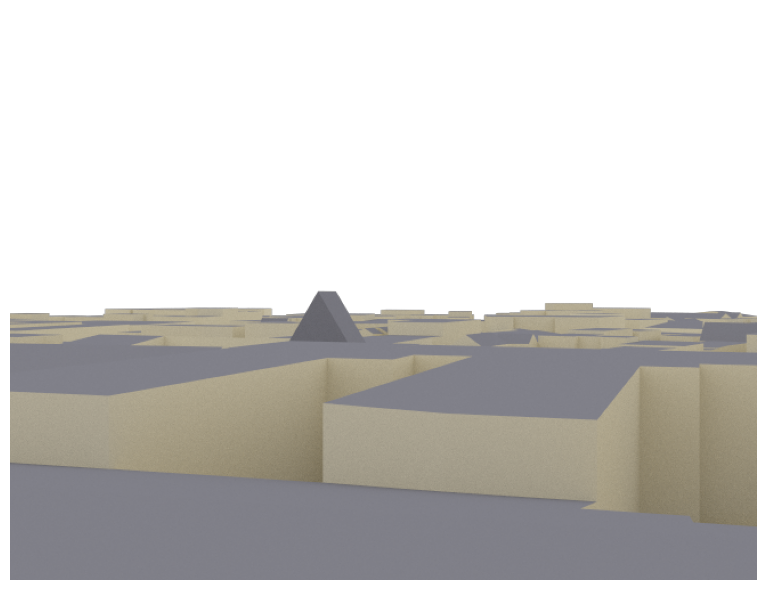

In [1]:
import sionna
from sionna.rt import load_scene, Camera

# Load Integrated scene
scene = load_scene(sionna.rt.scene.munich)

# Open 3D preview (only works in Jupyter notebook)
scene.preview()

# Render scene to file from preview viewpoint
scene.render_to_file(camera="preview",
                    filename="scene.png")

# Create new camera with different configuration
my_cam = Camera("my_cam",  position=[0, -10, 30])
scene.add(my_cam)

# Render scene with new camera
scene.render("my_cam")

# Render scene to file in high resolution
scene.render_to_file(camera="my_cam",
                    filename="scene2.png",
                    resolution=[1920, 1080])


Configuration of radio devices, path and coverage map computation, visualization in Sionna RT


In [2]:
from sionna.rt import Transmitter, Receiver, PlanarArray

# COnfigure antenna array for all transmitters
scene.tx_array = PlanarArray(
    num_rows=8,
    num_cols=2,
    vertical_spacing=0.7,
    horizontal_spacing=0.5,
    pattern="tr38901",
    polarization="VH"
)

# Configure antenna array for all receivers
scene.rx_array = PlanarArray(
    num_rows=1,
    num_cols=1,
    vertical_spacing=0.5,
    horizontal_spacing=0.5,
    pattern="dipole",
    polarization="cross"
)

# Create transmitter
tx = Transmitter(
    name="tx",
    position=[8.5, 21, 27],
    orientation=[0, 0, 0]
)
scene.add(tx)

rx = Receiver(
    name="rx",
    position=[45, 90, 1.5],
    orientation=[0, 0, 0]
)

scene.add(rx)
tx.look_at(rx) #TX points towards RX

# Compute propagation paths
scene.synthetic_array = True
paths = scene.compute_paths(
    max_depth = 3,
    diffraction = True
)

# Compute coverage map
cm = scene.coverage_map(
    max_depth=3,
    diffraction=True
)

# Visualize paths in the 3D preview
scene.preview(paths= paths, coverage_map=cm)


Renderer(camera=PerspectiveCamera(aspect=1.31, children=(DirectionalLight(intensity=0.25, matrixWorldNeedsUpda…